In [143]:
# Importing packages.

import math as math
import numpy as np
import sys
import random as rand
from subprocess import call
from uuid import uuid4
import matplotlib.pyplot as plt

In [144]:
# Read the LHE lines.

gg_file = open('gg_cross.txt', 'r')
gq_file = open('gq_cross.txt', 'r')

gg_lines = gg_file.readlines()
gq_lines = gq_file.readlines()

gg_file.close()
gq_file.close()

print(len(gg_lines))

200


In [145]:
# Make array with gg_cross.txt.

gg_cross = []

i = 0    # counter

for line in enumerate(gg_lines):
    gg_cross.append(line[1])
    gg_cross[i] = float(cross[i])
    i = i + 1

In [146]:
# Make array with gq_cross.txt

spaces = []       # where the spaces are in each line.       
first, second, third, fourth, fifth, sixth = [], [], [], [], [], []         # the cross section for each quark flavour.

gq_cross = []

for line in enumerate(gq_lines):

    for i in range(len(line[1])):

        if line[1][i] == ' ':

            spaces.append(i)
        
i = 0                # counter

while i < (len(spaces)): 
    
    first.append(spaces[i]) 
    second.append(spaces[i+1]) 
    third.append(spaces[i+2]) 
    fourth.append(spaces[i+3]) 
    fifth.append(spaces[i+4]) 
    sixth.append(spaces[i+5]) 
    
    i = i+6

q1, q2, q3, q4, q5 = [], [], [], [], []

i = 0                # counter

for line in enumerate(gq_lines): 
    
    q1.append(line[1][0 : first[i]])
    q1[i] = float(q1[i])
    
    q2.append(line[1][first[i]+1 : second[i]])
    q2[i] = float(q2[i])
    
    q3.append(line[1][second[i]+1 : third[i]])
    q3[i] = float(q3[i])
    
    q4.append(line[1][third[i]+1 : fourth[i]])
    q4[i] = float(q4[i])
    
    q5.append(line[1][fourth[i]+1 : fifth[i]])
    q5[i] = float(q5[i])
 
    gq_cross.append(q1[i] + q2[i] + q3[i] + q4[i] + q5[i])

    i = i + 1

In [147]:
# Make the total array

total = []

for i in range(len(gg_cross)):
    total.append(gg_cross[i] + gq_cross[i])

In [148]:
# Make the invariant mass array.

M = 6000             # lower limit on invariant mass interval
invariant_Mass = []

for i in range(len(gg_lines)):
    invariant_Mass.append(M)
    M = M + 10

In [149]:
# Convert to TeV.

for i in range(len(invariant_Mass)):
    invariant_Mass[i] = invariant_Mass[i]/1000
    gg_cross[i] = gg_cross[i]*1000
    gq_cross[i] = gq_cross[i]*1000
    total[i] = total[i]*1000

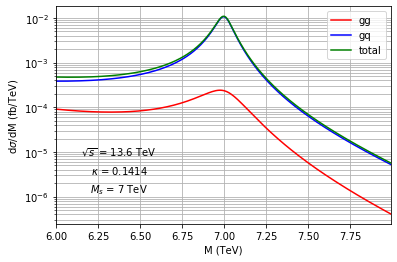

In [156]:
fig, ax = plt.subplots()
plt.xlim(invariant_Mass[0], invariant_Mass[len(invariant_Mass)-1])
ax.set_yscale('log')

plt.plot(invariant_Mass, gg_cross, label = 'gg', color = 'red')
plt.plot(invariant_Mass, gq_cross, label = 'gq', color = 'blue')
plt.plot(invariant_Mass, total, label = 'total', color = 'green')

plt.xlabel('M (TeV)')
plt.ylabel('d$\sigma$/dM (fb/TeV)')
plt.legend(loc='upper right')

plt.grid(True, which='both', axis='y')
plt.grid(True, which='both', axis='x')

plt.text(6.375, 10e-6, '$\sqrt{s}$ = 13.6 TeV', fontsize=10, ha='center', va='center')
plt.text(6.375, 4e-6, '$\kappa$ = 0.1414', fontsize = 10, ha='center', va='center')
plt.text(6.375, 1.5e-6, '$M_{s}$ = 7 TeV', fontsize = 10, ha='center', va='center')

plt.show()